**INTERNSHIP**
>**To Explore Business Analytics (Level - Beginner & Intermediate)**


*   Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
*   As a business manager, try to find out the weak areas where you can work to make more profit.
*   What all business problems you can derive by exploring the data? 
### Importing Libraries




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:

df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**CORRELATION MATRIX**

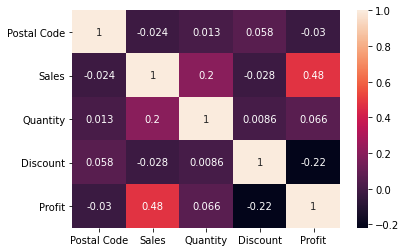

In [ ]:
cor=df.corr()
sb.heatmap(cor, annot=True)

**Numerical Features**

In [ ]:
numerical_features = [i for i in df.columns if df[i].dtypes != 'O']
numerical_features

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

**Categorical Features**

In [ ]:
categorical_features = [i for i in df.columns if df[i].dtypes == 'O']
categorical_features

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [ ]:
for i in categorical_features:
    print('Feature : {}\nNumber of unique values : {}\n'.format(i, len(df[i].unique())))

Feature : Ship Mode
Number of unique values : 4

Feature : Segment
Number of unique values : 3

Feature : Country
Number of unique values : 1

Feature : City
Number of unique values : 531

Feature : State
Number of unique values : 49

Feature : Region
Number of unique values : 4

Feature : Category
Number of unique values : 3

Feature : Sub-Category
Number of unique values : 17



*********** Ship Mode **********


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


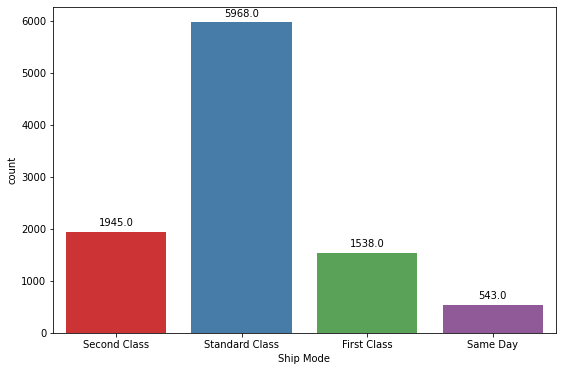

*********** Segment **********


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


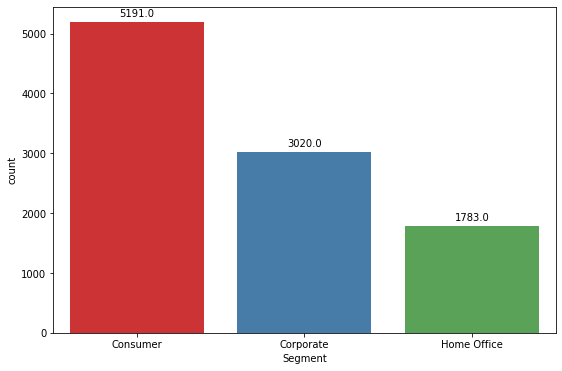

*********** Region **********


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


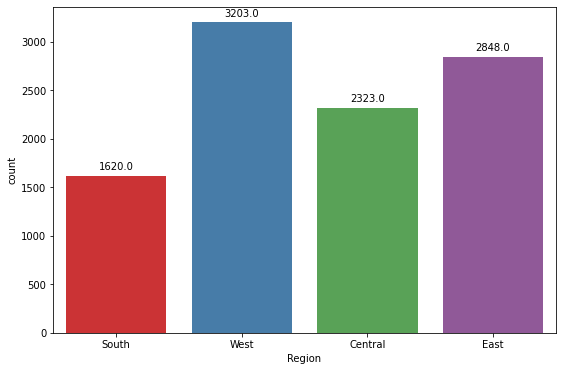

*********** Category **********


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


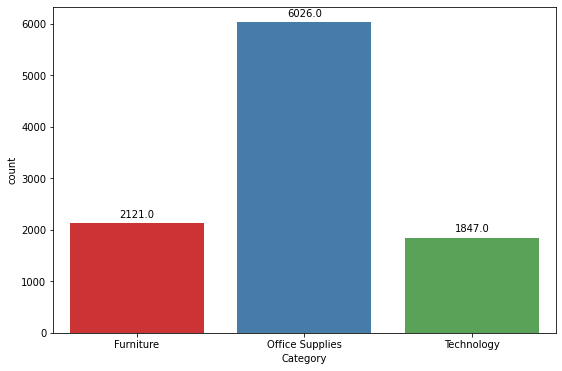

*********** Sub Category **********


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


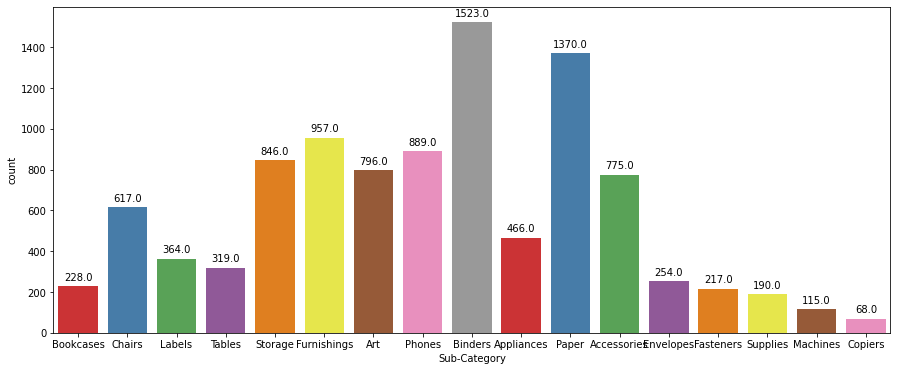

In [ ]:
plot=["Ship Mode","Segment","Region","Category","Sub Category"]

for i in plot:
    print("***********",i,"**********")
    if i=="Sub Category":
        plt.figure(figsize = (15, 6))
        sm = sb.countplot('Sub-Category', data = df,palette = "Set1")
        for p in sm.patches:
            sm.annotate(format(p.get_height(), '.1f'),
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), 
                         textcoords = 'offset points')
        plt.show()
        break
    

    plt.figure(figsize = (9, 6))
    sm = sb.countplot(i, data = df,palette = "Set1")
    for p in sm.patches:
        sm.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., 
                     p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')


    plt.show()

**Sales With Respect to Category**

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


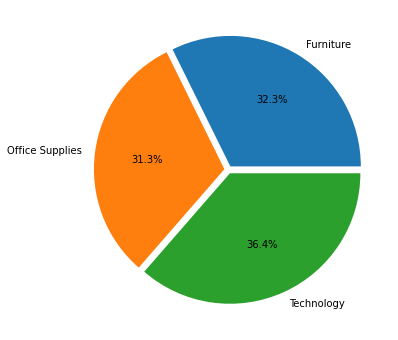

In [ ]:

s_group = df.groupby('Category')['Sales'].sum().reset_index()
print(s_group)
labels = df['Category'].unique()
plt.figure(figsize = (6, 6))
plt.pie(s_group['Sales'], autopct='%1.1f%%',labels = labels, explode = (0.03,0.03,0.03))

plt.show()

**Creating Subgroups of Profit**

profit - whose profits are greater than 0

neutral - whose profits are equal to 0

loss - whose profits are less than 0

In [ ]:
profit = df[df['Profit'] > 0]
neutral = df[df['Profit'] == 0]
loss = df[df['Profit'] < 0]

**Profit with respect to Category**

          Category       Profit
0        Furniture   79387.3818
1  Office Supplies  179106.0593
2       Technology  184034.8663


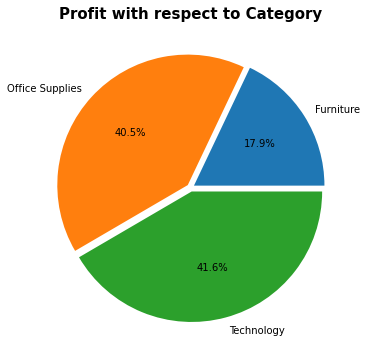

In [ ]:
p_group = profit.groupby('Category')['Profit'].sum().reset_index()
print(p_group)

labels = df['Category'].unique()
plt.figure(figsize = (6, 6))

plt.pie(p_group['Profit'],autopct='%1.1f%%',labels = labels, explode = (0.03,0.03,0.03))
plt.title('Profit with respect to Category', fontweight = 'bold', size = 15)

plt.show()

**Profit with respect to region**

    Region       Profit
0  Central   96021.2475
1     East  141113.3875
2    South   74254.2626
3     West  131139.4098


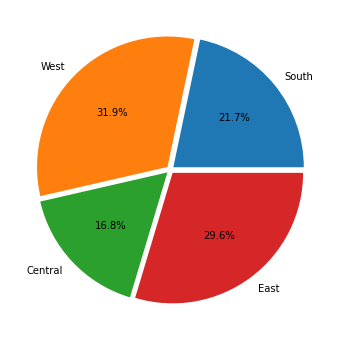

In [ ]:

rp_group = profit.groupby('Region')['Profit'].sum().reset_index()
print(rp_group)
labels = df['Region'].unique()
plt.figure(figsize = (6, 6))
plt.pie(rp_group['Profit'],autopct='%1.1f%%',labels = labels, explode = (0.03,0.03,0.03, 0.03))

plt.show()

**Profit with respect to segment**

       Segment       Profit
0     Consumer  219064.9204
1    Corporate  136766.3416
2  Home Office   86697.0454


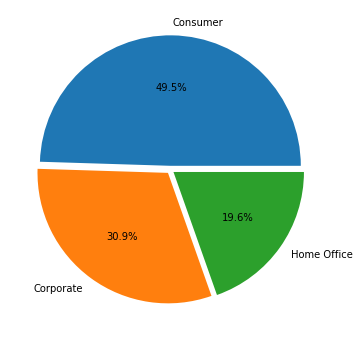

In [ ]:
sp_group = profit.groupby('Segment')['Profit'].sum().reset_index()
print(sp_group)
labels = df['Segment'].unique()
plt.figure(figsize = (6, 6))
plt.pie(sp_group['Profit'],autopct='%1.1f%%',labels = labels, explode = (0.03,0.03, 0.03))

plt.show()

**Profit with respect to Discount**

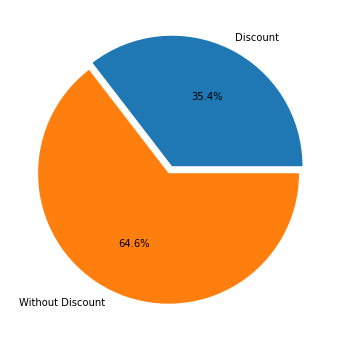

In [ ]:
disc = profit[profit['Discount'] > 0]
w_disc = profit[profit['Discount'] == 0]
labels = ['Discount', 'Without Discount']
size = [disc['Profit'].mean(), w_disc['Profit'].mean()]
plt.figure(figsize = (6, 6))

plt.pie(size, autopct='%1.1f%%', labels = labels, explode = (0.03, 0.03))

plt.show()

**Profit with respect to sub-category**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


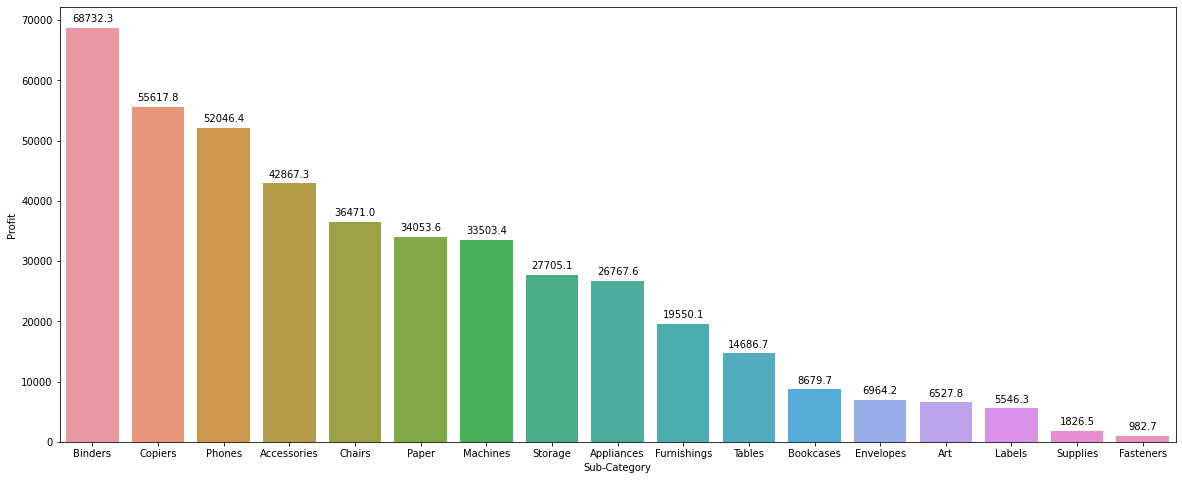

In [ ]:
sscb_group = profit.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)

plt.figure(figsize = (20, 8))
pcat = sb.barplot('Sub-Category', 'Profit', data = sscb_group)
for p in pcat.patches:
    pcat.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

**Cities with greater profit** 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


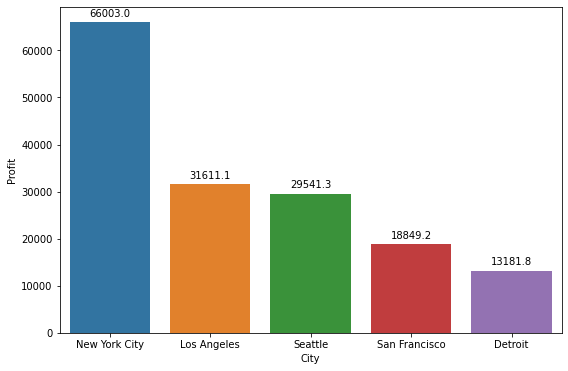

In [ ]:
sscbct_group = profit.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
sscbct_group = sscbct_group.head(5)

plt.figure(figsize = (9, 6))
pcatc = sb.barplot('City', 'Profit', data = sscbct_group)
for p in pcatc.patches:
    pcatc.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

**Loss with respect to category**

          Category      Profit
0        Furniture  60936.1090
1  Office Supplies  56615.2585
2       Technology  38579.9182


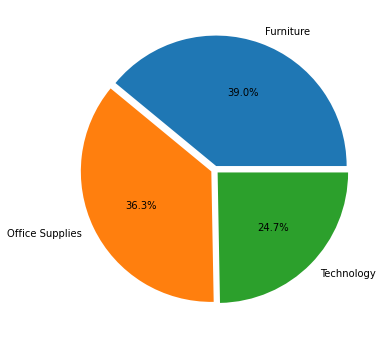

In [ ]:
lc_group = loss.groupby('Category')['Profit'].sum().reset_index()
lc_group['Profit'] = lc_group['Profit'].apply(lambda x: x*-1)
print(lc_group)
labels = df['Category'].unique()
plt.figure(figsize = (6, 6))

plt.pie(lc_group['Profit'], autopct='%1.1f%%',labels = labels, explode = (0.03,0.03,0.03))

plt.show()

**Loss with respect to region**

    Region      Profit
0  Central  56314.8850
1     East  49590.6075
2    South  27504.8323
3     West  22720.9609


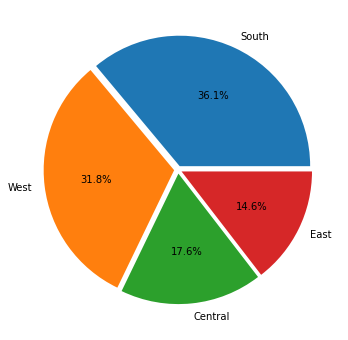

In [ ]:
lr_group = loss.groupby('Region')['Profit'].sum().reset_index()
lr_group['Profit'] = lr_group['Profit'].apply(lambda x: x*-1)
print(lr_group)
labels = df['Region'].unique()
plt.figure(figsize = (6, 6))
plt.pie(lr_group['Profit'], autopct='%1.1f%%',labels = labels, explode = (0.03,0.03,0.03, 0.03))
plt.show()

**Loss with respect to segment**

       Segment      Profit
0     Consumer  84945.7112
1    Corporate  44787.2076
2  Home Office  26398.3669


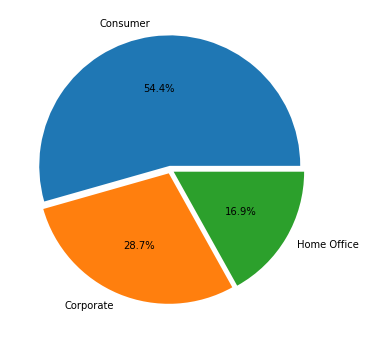

In [ ]:
lsc_group = loss.groupby('Segment')['Profit'].sum().reset_index()
lsc_group['Profit'] = lsc_group['Profit'].apply(lambda x: x*-1)
print(lsc_group)
labels = df['Segment'].unique()
plt.figure(figsize = (6, 6))
plt.pie(lsc_group['Profit'], autopct='%1.1f%%',labels = labels, explode = (0.03, 0.03, 0.03))

plt.show()

**10 cities with greater loss**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


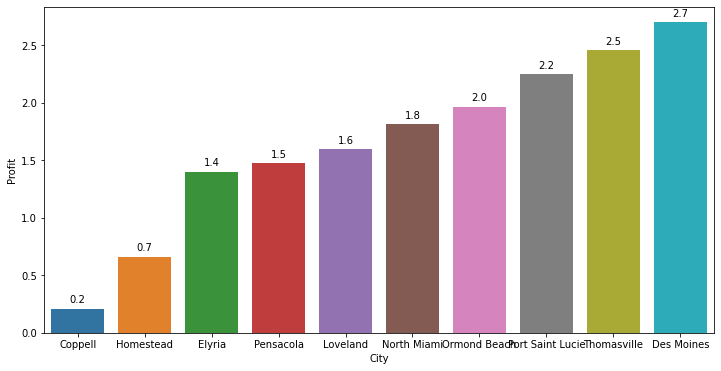

In [ ]:
sscbctl_group = loss.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
sscbctl_group['Profit'] = sscbctl_group['Profit'].apply(lambda x: x*-1)
sscbctl_group = sscbctl_group.head(10)

plt.figure(figsize = (12, 6))

pcatcl = sb.barplot('City', 'Profit', data = sscbctl_group)

for p in pcatcl.patches:
    pcatcl.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

# **Conclusion**
### **Dataset Quality**
The dataset was quite good and well organized. There is enough observation that helped us to analyze the business conditions and perform Exploratory Data Analysis and there was no missing values also.

### **Statistical Informations:**

**Total Sales: 2297200.86**

**Total Profit: 442528.31**

**Total Loss: 156131.29**

###**Customer Behaviour:**
Most of the customer choose Standard Class over the other three shipping modes. We got a large amount of customers from the West and East region. Customers prefer Office Supplies Products from us most. Binders, Paper, Furnishings, Phones and Accessories are the top wanted items from our shop.
###**Profit**
We got highest sales and profit (41.6%) from Technology. Interestingly, we got highest profit by selling less number of items from Technology. As our customers are mostly from the West side, we got most of our profit from there. Our profit got decreased, when we offer any discount on a product. We have got 64.6% of our profit from the products without discount and only 36.4% of our profit from the products with discount Top 10 products which brought most of the profits: Binders, Copiers, Phones, Accessories, Chairs, Paper, Machines, Storage, Appliances, Furnishings Top 5 Cities with greater profit: New York City, Los Angeles, Seattle, San Francisco, Detroit
###**Places need to be improved:**
Customers are preferring the Standard Class more. We should upgrade the other shipping modes and make them more customer-friendly. Furniture category brings most of the losses. We will have to look into it and solve the issues. We got less customer from the South with a higher loss value. In the Southern pert of the country, we will have to be more customer-friendly and come to know there needs. As Discount couldn't improve profit scale, we should be more careful regarding our Discount policy. Top 10 Cities with greater loss: Coppell, Homestead Elyria, Pensacola, Loveland, North Miami, Ormond Beach, Port Saint Lucie, Thomasville, Des Moines. We will have to look into these cities and find out the reasons of losses.